In [2]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

2024-11-08 10:08:54.203513: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 10:08:54.244542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 10:08:54.244606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 10:08:54.245468: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 10:08:54.252982: I tensorflow/core/platform/cpu_feature_guar

In [3]:
model = VGG16(weights='imagenet')

2024-11-08 10:08:56.362896: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-08 10:08:56.419172: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-08 10:08:56.419363: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

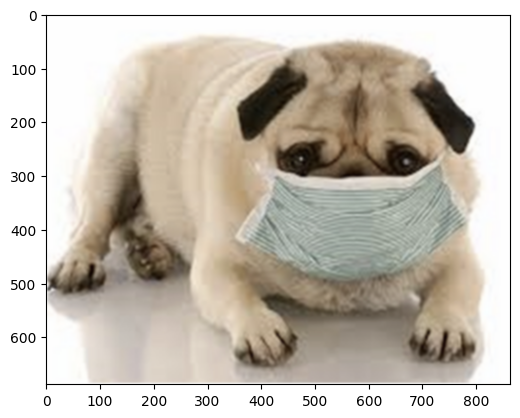

In [12]:
import matplotlib.pyplot as plt

image = cv2.imread("../data/pug.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [13]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [14]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 [==============================] - 0s 19ms/step
pug (82.42%)


In [15]:
decode_predictions(yhat)

[[('n02110958', 'pug', 0.82419515),
  ('n03803284', 'muzzle', 0.062357407),
  ('n02099712', 'Labrador_retriever', 0.02971034),
  ('n02104029', 'kuvasz', 0.023640208),
  ('n02091467', 'Norwegian_elkhound', 0.0056676064)]]

In [ ]:
# full_names

['cat.5620.jpg',
 'dog.12450.jpg',
 'cat.11882.jpg',
 'dog.4109.jpg',
 'cat.5341.jpg',
 'cat.6406.jpg',
 'cat.9518.jpg',
 'dog.11562.jpg',
 'cat.11696.jpg',
 'cat.3525.jpg',
 'dog.6152.jpg',
 'dog.2956.jpg',
 'cat.4883.jpg',
 'cat.5723.jpg',
 'cat.7124.jpg',
 'cat.3821.jpg',
 'dog.12218.jpg',
 'cat.6873.jpg',
 'cat.3543.jpg',
 'dog.2318.jpg',
 'dog.3823.jpg',
 'dog.3655.jpg',
 'dog.8925.jpg',
 'dog.8426.jpg',
 'dog.10524.jpg',
 'dog.2767.jpg',
 'dog.9004.jpg',
 'dog.4573.jpg',
 'dog.1062.jpg',
 'dog.7733.jpg',
 'cat.1698.jpg',
 'cat.12210.jpg',
 'cat.4648.jpg',
 'dog.7596.jpg',
 'cat.3883.jpg',
 'cat.10590.jpg',
 'dog.5204.jpg',
 'cat.24.jpg',
 'cat.3022.jpg',
 'cat.113.jpg',
 'dog.10083.jpg',
 'dog.5616.jpg',
 'dog.564.jpg',
 'cat.4735.jpg',
 'cat.510.jpg',
 'cat.1379.jpg',
 'dog.11572.jpg',
 'cat.8963.jpg',
 'cat.7140.jpg',
 'dog.8483.jpg',
 'cat.10512.jpg',
 'cat.3628.jpg',
 'cat.10678.jpg',
 'cat.12321.jpg',
 'dog.10500.jpg',
 'cat.9928.jpg',
 'cat.1124.jpg',
 'dog.10971.jpg',
 'do

In [24]:
import os

path = "../data/dogs-vs-cats_241108/train/"
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [26]:
import random
import matplotlib.image as mpimg 

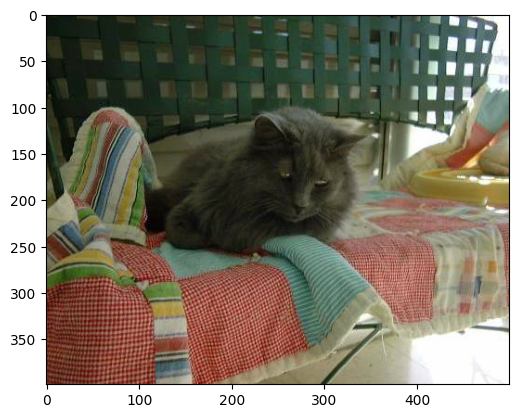

In [28]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [29]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2] * 100))

1/1 [==============================] - 0s 17ms/step
Persian_cat (15.02%)


In [ ]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    return preprocess_input(image)

In [31]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 [==============================] - 0s 20ms/step


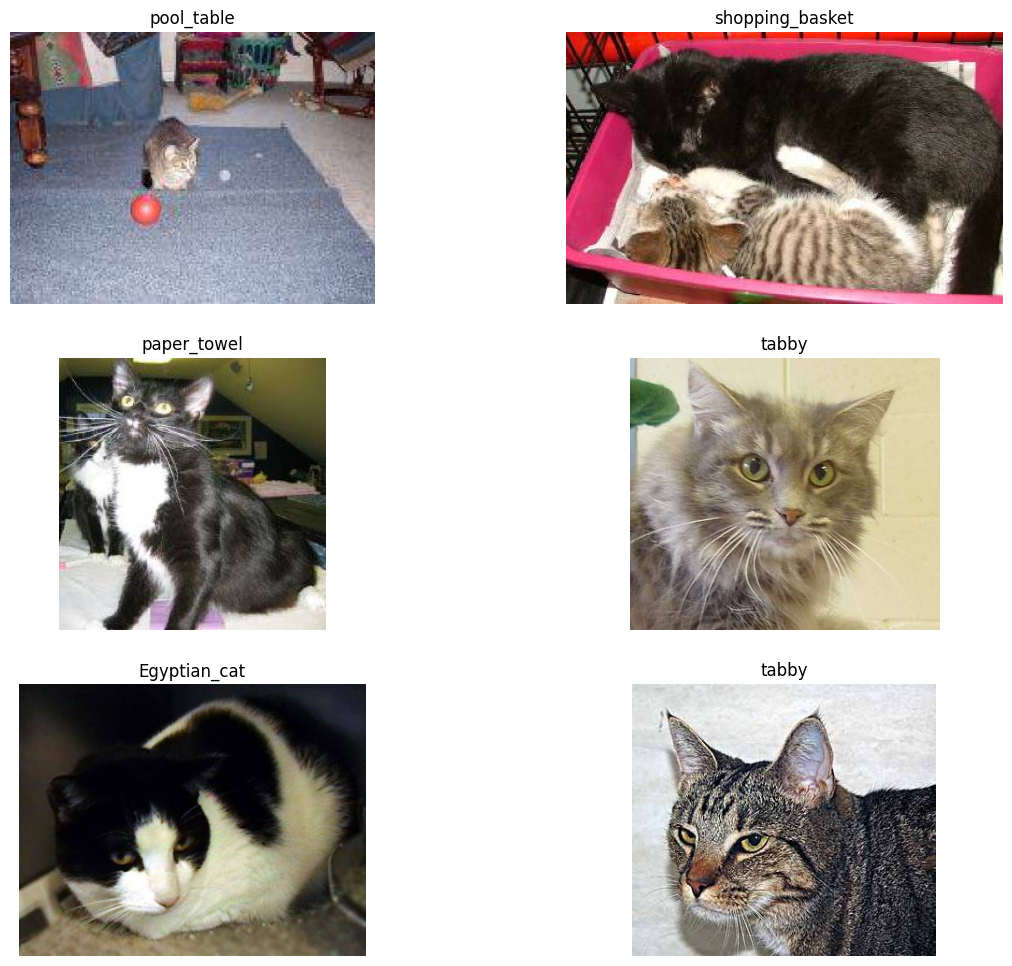

In [33]:
plt.figure(figsize=(14,12))
idx = 1
for each in random.choices(full_names, k=6):
    image = mpimg.imread(path+each)
    plt.subplot(3,2,idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')
plt.show()